# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech
**Nama**: Raditya Nauval Amirullah

**Email**: radityaganesha01@gmail.com

**Id Dicoding**: zerornx

# Business Understanding

## 1. Identifikasi Tujuan Bisnis
Pada tahap tahap identifikasi tujuan bisnis, terdapat dua hal yang menjadi fokus, yaitu pendeskripsian masalah dan menentukan kemungkinan solusi atas permasalahan tersebut. Pada proyek data science kali ini, masalah serta target solusi yang akan menjadi fokus utama yaitu:
- Deskripsi masalah: Tingginya rasio jumlah karyawan yang keluar dengan total keseluruhan karyawan
- Tujuan Bisnis (Target solusi): Mengurangi attrition rate (rasio jumlah karyawan yang keluar)

## 2. Menetapkan Tujuan Analisis
Pada tahap penentuan tujuan analisis, kita akan mengubah pertanyaan atau tujuan bisnis menjadi pertanyaan analisis yang lebih spesifik. Selain itu, kita juga akan menentukan matriks kesuksesan dari proyek data science yang sedang dilakukan.
- Pertanyaan analisis: Apa saja faktor yang memiliki pengaruh paling besar dalam menentukan apakah karyawan akan meninggalkan perusahaan?
- Matriks kesuksesan: Akurasi model > 90% dan pengurangan persentase attrition

## 3. Menentukan Cakupan Proyek
Cakupan proyek data science kali ini yaitu terbatas pada analisis dan pemodelan terkait data [karyawan](https://github.com/dicodingacademy/dicoding_dataset/blob/main/employee/employee_data.csv)
- Lingkup proyek: Analisis data dan pemodelan machine learning untuk data karyawan
- Sumber data: Data karyawan, seperti penilaian kinerja, survey kepuasan, dll.

# Persiapan

## Menyiapkan library yang dibutuhkan

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import joblib

### Menyiapkan data yang akan digunakan

Sumber dari data yang digunakan dalam proyek data science kali ini yaitu bersumber dari [Github](https://github.com/dicodingacademy/dicoding_dataset/blob/main/employee/employee_data.csv). Data yang digunakan sudah mencangkup informasi-informasi mengenai karyawan, seperti umur, id karyawan, dll.

## Data Understanding

In [55]:
df = pd.read_csv('employee_data.csv')
df.head().T

,0,1,2,3,4
EmployeeId,1,2,3,4,5
Age,38,37,51,42,40
Attrition,0,1,1,0,0
BusinessTravel,Travel_Frequently,Travel_Rarely,Travel_Rarely,Travel_Frequently,Travel_Rarely
DailyRate,1444,1141,1323,555,1194
Department,Human Resources,Research & Development,Research & Development,Sales,Research & Development
DistanceFromHome,1,11,4,26,2
Education,4,2,4,3,4
EducationField,Other,Medical,Life Sciences,Marketing,Medical
EmployeeCount,1,1,1,1,1


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeId                1470 non-null   int64 
 1   Age                       1470 non-null   int64 
 2   Attrition                 1470 non-null   int64 
 3   BusinessTravel            1470 non-null   object
 4   DailyRate                 1470 non-null   int64 
 5   Department                1470 non-null   object
 6   DistanceFromHome          1470 non-null   int64 
 7   Education                 1470 non-null   int64 
 8   EducationField            1470 non-null   object
 9   EmployeeCount             1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Data Preparation / Preprocessing

Data preparation merupakan salah satu tahapan penting dalam menyelesaikan proyek data science. Data preparation bertujuan untuk menyiapkan data agar siap digunakan dalam proses analisis maupun pemodelan. Beberapa langkah yang termasuk dalam tahapan data preparation seperti gathering data (pengumpulan data), data cleansing (pembersihan data), data transformation (transformasi data), reduksi dimensi, dll.

In [57]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.121769,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.327130,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


## Data Cleansing

Data cleansing merupakan sebuah proses untuk memastikan data bebas dari kesalahan, sehingga dapat dilakukan proses analisis dan pemodelan dengan akurat. Beberapa hal yang perlu dilakukan dalam tahap data cleansing seperti penanganan missing value, inkonsistensi data, kesalahan entri, maupun data duplikat.

### Fix Missing Value

In [58]:
df.isna().sum()

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Dikarenakan jumlah missing value pada kolom **Attrition** berjumlah cukup banyak, maka solusi yang digunakan untuk mengatasi masalah tersebut ialah dengan mengisi nilai tersebut dengan nilai tengah dari data pada kolom itu. Pengisian nilai dilakukan karena jika menggunakan solusi penghapusan nilai yang hilang, maka informasi yang hilang juga akan banyak, yang mengakibatkan proses analisis dan pemodelan menjadi kurang akurat.

In [59]:
df['Attrition'].value_counts()

Attrition
0    1291
1     179
Name: count, dtype: int64

In [60]:
df.fillna({'Attrition': df['Attrition'].median()}, inplace=True)
df['Attrition'].value_counts()

Attrition
0    1291
1     179
Name: count, dtype: int64

In [61]:
df['EmployeeId'].duplicated().sum()

0

In [62]:
df['Attrition'] = df['Attrition'].astype('int')

In [63]:
df.to_csv('employee_data.csv', index=False)

## Grouping Data

Grouping data (pengelompokan data) merupakan proses mengelompokan data berdasarkan kriteria atau kelompok tertentu, sehingga analisis dapat dilakukan secara terpisah sesuai dengan pengelompokan. Grouping data memiliki beberapa manfaat seperti memahami sebaran data pada kelompok tertentu, menemukan pola atau tren, segmentasi atau klasifikasi, serta mengetahui perbandingan antar kelompok.
Dalam kasus kali ini, pengelompokan akan dilakukan berdasarkan enam kelompok, yaitu Departemen, Job Role, Job Level, Education Field, Business Travel, dan Over Time.

In [64]:
df_department = df.groupby(by=['Department', 'Attrition']).agg({
    'EmployeeId': 'nunique',
    'Age': 'mean',
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean',
    'EnvironmentSatisfaction': 'mean',
    'YearsAtCompany': 'mean'
}).reset_index().set_index(['Department', 'Attrition'])

df_department

EmployeeId        Age  MonthlyIncome  \
Department             Attrition                                         
Human Resources        0                  57  38.385965    6818.982456   
                       1                   6  32.333333    5092.000000   
Research & Development 0                 854  37.539813    6532.263466   
                       1                 107  33.074766    4277.859813   
Sales                  0                 380  36.947368    7157.415789   
                       1                  66  34.212121    5817.772727   

                                  JobSatisfaction  EnvironmentSatisfaction  \
Department             Attrition                                             
Human Resources        0                 2.649123                 2.771930   
                       1                 2.166667                 1.833333   
Research & Development 0                 2.751756                 2.791569   
                       1                 2.523364                 2.364486   
Sales                  0                 2.784211                 2.713158   
                       1                 2.560606                 2.484848   

                                  YearsAtCompany  
Department             Attrition                  
Human Resources        0                7.368421  
                       1                6.000000  
Research & Development 0                7.111241  
                       1                4.897196  
Sales                  0                7.578947  
                       1                5.590909

In [65]:
df_jobrole = df.groupby(by=['JobRole', 'Attrition'], as_index=True).agg({
    'EmployeeId': 'nunique',
    'Age': 'mean',
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean',
    'YearsInCurrentRole': 'mean'
}).reset_index().set_index(['JobRole', 'Attrition'])

df_jobrole

EmployeeId        Age  MonthlyIncome  \
JobRole                   Attrition                                         
Healthcare Representative 0                 123  39.926829    7465.528455   
                          1                   8  38.000000    8501.000000   
Human Resources           0                  46  35.913043    4124.065217   
                          1                   6  32.333333    5092.000000   
Laboratory Technician     0                 210  34.904762    3296.433333   
                          1                  49  30.632653    2983.183673   
Manager                   0                  97  46.783505   17201.484536   
                          1                   5  46.400000   16797.400000   
Manufacturing Director    0                 138  38.318841    7270.847826   
                          1                   7  37.857143    7774.000000   
Research Director         0                  78  43.858974   15947.346154   
                          1                   2  49.500000   19395.500000   
Research Scientist        0                 254  34.496063    3311.228346   
                          1                  38  32.500000    2763.684211   
Sales Executive           0                 287  36.797909    6878.560976   
                          1                  39  37.564103    7260.717949   
Sales Representative      0                  58  31.448276    2686.586207   
                          1                  25  27.840000    2485.440000   

                                     JobSatisfaction  YearsInCurrentRole  
JobRole                   Attrition                                       
Healthcare Representative 0                 2.780488            4.869919  
                          1                 2.875000            4.750000  
Human Resources           0                 2.608696            3.130435  
                          1                 2.166667            3.166667  
Laboratory Technician     0                 2.719048            3.433333  
                          1                 2.571429            2.204082  
Manager                   0                 2.721649            6.381443  
                          1                 2.400000            7.800000  
Manufacturing Director    0                 2.681159            5.057971  
                          1                 2.714286            3.285714  
Research Director         0                 2.705128            6.064103  
                          1                 2.500000           15.000000  
Research Scientist        0                 2.830709            3.425197  
                          1                 2.394737            2.263158  
Sales Executive           0                 2.773519            4.951220  
                          1                 2.615385            4.153846  
Sales Representative      0                 2.862069            2.362069  
                          1                 2.440000            1.200000

In [66]:
df_educationfield = df.groupby(by=['EducationField', 'Attrition']).agg({
    'EmployeeId': 'nunique',
    'JobRole': lambda x: x.mode(),
    'MonthlyIncome': 'mean',
    'YearsAtCompany': 'mean'
}).reset_index().set_index(['EducationField', 'Attrition'])

df_educationfield

EmployeeId  \
EducationField   Attrition               
Human Resources  0                  25   
                 1                   2   
Life Sciences    0                 536   
                 1                  70   
Marketing        0                 133   
                 1                  26   
Medical          0                 418   
                 1                  46   
Other            0                  72   
                 1                  10   
Technical Degree 0                 107   
                 1                  25   

                                                                JobRole  \
EducationField   Attrition                                                
Human Resources  0                                      Human Resources   
                 1                                      Human Resources   
Life Sciences    0                                   Research Scientist   
                 1                                Laboratory Technician   
Marketing        0                                      Sales Executive   
                 1                                      Sales Executive   
Medical          0          [Laboratory Technician, Research Scientist]   
                 1                                   Research Scientist   
Other            0                                Laboratory Technician   
                 1                                Laboratory Technician   
Technical Degree 0                                   Research Scientist   
                 1          [Laboratory Technician, Research Scientist]   

                            MonthlyIncome  YearsAtCompany  
EducationField   Attrition                                 
Human Resources  0            7339.520000        7.080000  
                 1            6011.500000        3.000000  
Life Sciences    0            6717.236940        7.236940  
                 1            4518.771429        5.128571  
Marketing        0            7491.789474        7.699248  
                 1            6616.038462        6.846154  
Medical          0            6685.578947        7.311005  
                 1            4914.891304        5.239130  
Other            0            6397.125000        6.611111  
                 1            3727.400000        3.600000  
Technical Degree 0            6089.280374        7.112150  
                 1            4341.720000        4.360000

In [67]:
df_businesstravel = df.groupby(by=['BusinessTravel', 'Department', 'Attrition']).agg({
    'EmployeeId': 'nunique',
    'Age': 'mean',
    # 'Department': lambda x: x.mode(),
    'JobRole': lambda x: x.mode(),
    'MonthlyIncome': 'mean',
    'JobSatisfaction': 'mean',
    'YearsAtCompany': 'mean'
}).reset_index().set_index(['BusinessTravel', 'Department', 'Attrition'])

df_businesstravel

EmployeeId        Age  \
BusinessTravel    Department             Attrition                          
Non-Travel        Human Resources        0                   6  43.666667   
                  Research & Development 0                  90  36.477778   
                                         1                   7  31.857143   
                  Sales                  0                  43  37.046512   
                                         1                   4  33.000000   
Travel_Frequently Human Resources        0                   9  35.666667   
                                         1                   2  30.000000   
                  Research & Development 0                 153  37.601307   
                                         1                  29  32.620690   
                  Sales                  0                  64  36.890625   
                                         1                  20  32.850000   
Travel_Rarely     Human Resources        0                  42  38.214286   
                                         1                   4  33.500000   
                  Research & Development 0                 611  37.680851   
                                         1                  71  33.380282   
                  Sales                  0                 273  36.945055   
                                         1                  42  34.976190   

                                                                  JobRole  \
BusinessTravel    Department             Attrition                          
Non-Travel        Human Resources        0                Human Resources   
                  Research & Development 0          Laboratory Technician   
                                         1             Research Scientist   
                  Sales                  0                Sales Executive   
                                         1                Sales Executive   
Travel_Frequently Human Resources        0                Human Resources   
                                         1                Human Resources   
                  Research & Development 0             Research Scientist   
                                         1          Laboratory Technician   
                  Sales                  0                Sales Executive   
                                         1           Sales Representative   
Travel_Rarely     Human Resources        0                Human Resources   
                                         1                Human Resources   
                  Research & Development 0             Research Scientist   
                                         1          Laboratory Technician   
                  Sales                  0                Sales Executive   
                                         1                Sales Executive   

                                                    MonthlyIncome  \
BusinessTravel    Department             Attrition                  
Non-Travel        Human Resources        0            9028.666667   
                  Research & Development 0            5913.577778   
                                         1            4629.714286   
                  Sales                  0            6798.046512   
                                         1            7043.500000   
Travel_Frequently Human Resources        0            5397.222222   
                                         1            6345.500000   
                  Research & Development 0            6652.437908   
                                         1            4481.137931   
                  Sales                  0            6572.937500   
                                         1            4297.600000   
Travel_Rarely     Human Resources        0            6807.976190   
                                         1            4465.250000   
                  Research & Development 0            6593.302782   
                    

In [68]:
df_demographic = df.groupby(by=['Gender', 'MaritalStatus', 'Attrition']).agg({
    'EmployeeId': 'nunique',
    'Age': 'mean'
}).reset_index().set_index(['Gender', 'MaritalStatus', 'Attrition'])

df_demographic

EmployeeId        Age
Gender MaritalStatus Attrition                       
Female Divorced      0                 110  38.090909
                     1                   7  32.571429
       Married       0                 248  38.810484
                     1                  24  36.750000
       Single        0                 159  36.723270
                     1                  40  29.650000
Male   Divorced      0                 194  37.396907
                     1                  16  36.625000
       Married       0                 363  37.421488
                     1                  38  34.736842
       Single        0                 217  35.917051
                     1                  54  33.129630

# EDA (Exploratory Data Analysis)
EDA merupakan sebuah proses untuk memahami data yang akan digunakan. Proses yang dapat dilakukan untuk memahami data seperti melihat visualisasi data serta menganalisis fitur-fitur penting yang ada pada data (dataset). Selain itu, dalam EDA juga dilakukan eksplorasi untuk menemukan pola atau tren pada data, sehingga kita dapat menarik kesimpulan atau asumsi kuat berdasarkan pola atau tren tersebut.

### Visualisasi df_demographic

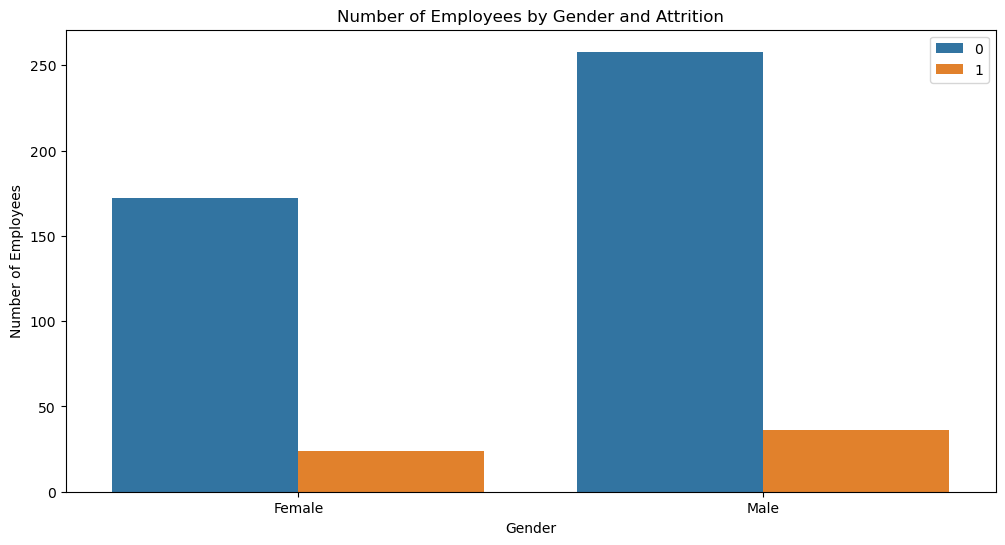

In [69]:
df_demographic_reset = df_demographic.reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_demographic_reset, x='Gender', y='EmployeeId', hue='Attrition', errorbar=None)
plt.title('Number of Employees by Gender and Attrition')
plt.ylabel('Number of Employees')
plt.xlabel('Gender')
plt.legend(loc='upper right')
plt.show()

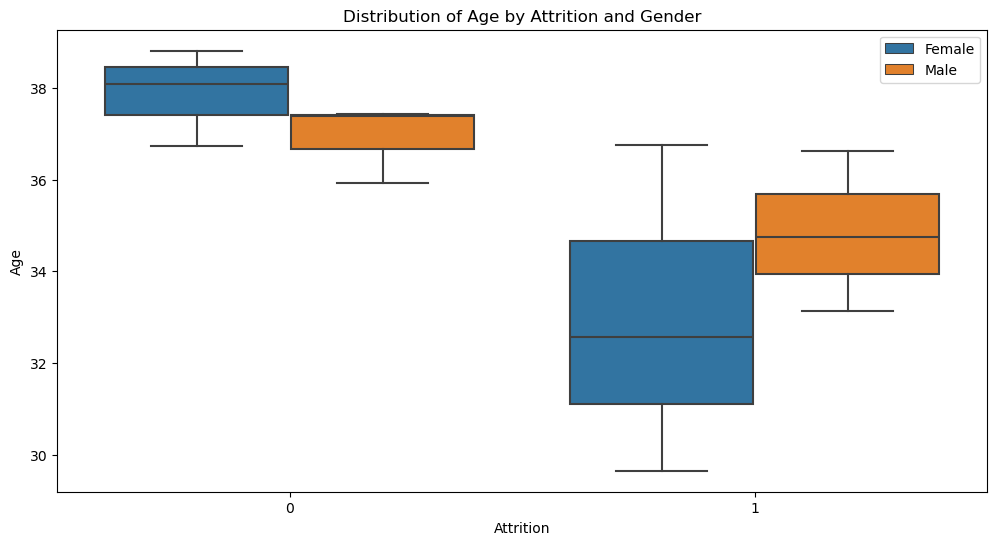

In [70]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_demographic_reset, x='Attrition', y='Age', hue='Gender')
plt.title('Distribution of Age by Attrition and Gender')
plt.ylabel('Age')
plt.xlabel('Attrition')
plt.legend(loc='upper right')
plt.show()

**Kesimpulan**

Berdasarkan grafik di atas, dapat disimpulkan bahwa karyawan dengan jenis kelamin laki-laki memiliki tingkat attrition paling tinggi, dan rata-rata berusia 34 tahun

### Visualisasi df_department

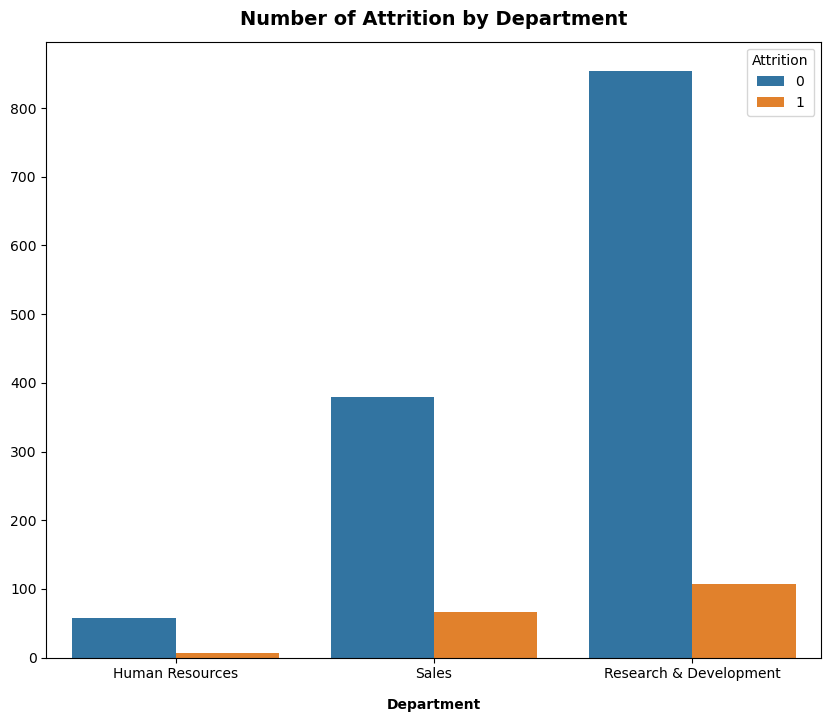

In [71]:
df_department_reset = df_department.reset_index()

plt.subplots(figsize=(10,8))
sns.barplot(data=df_department_reset.sort_values(by='EmployeeId', ascending=True), x='Department', y='EmployeeId', hue='Attrition', errorbar='ci')
plt.title('Number of Attrition by Department', fontsize=14, fontweight='bold', pad=12)
plt.xlabel('Department', labelpad=12, fontweight='bold')
plt.ylabel(None);

**Kesimpulan**

Berdasarkan grafik di atas, departemen yang memiliki tingkat attrition tertinggi yaitu Research & Development. Namun, departmen Sales memiliki perbedaan yang lumayan banyak antara attrition dan yang tidak, jika dilihat dari total keseluruhan karyawan di departemen tersebut.

### Visualisasi df_jobrole

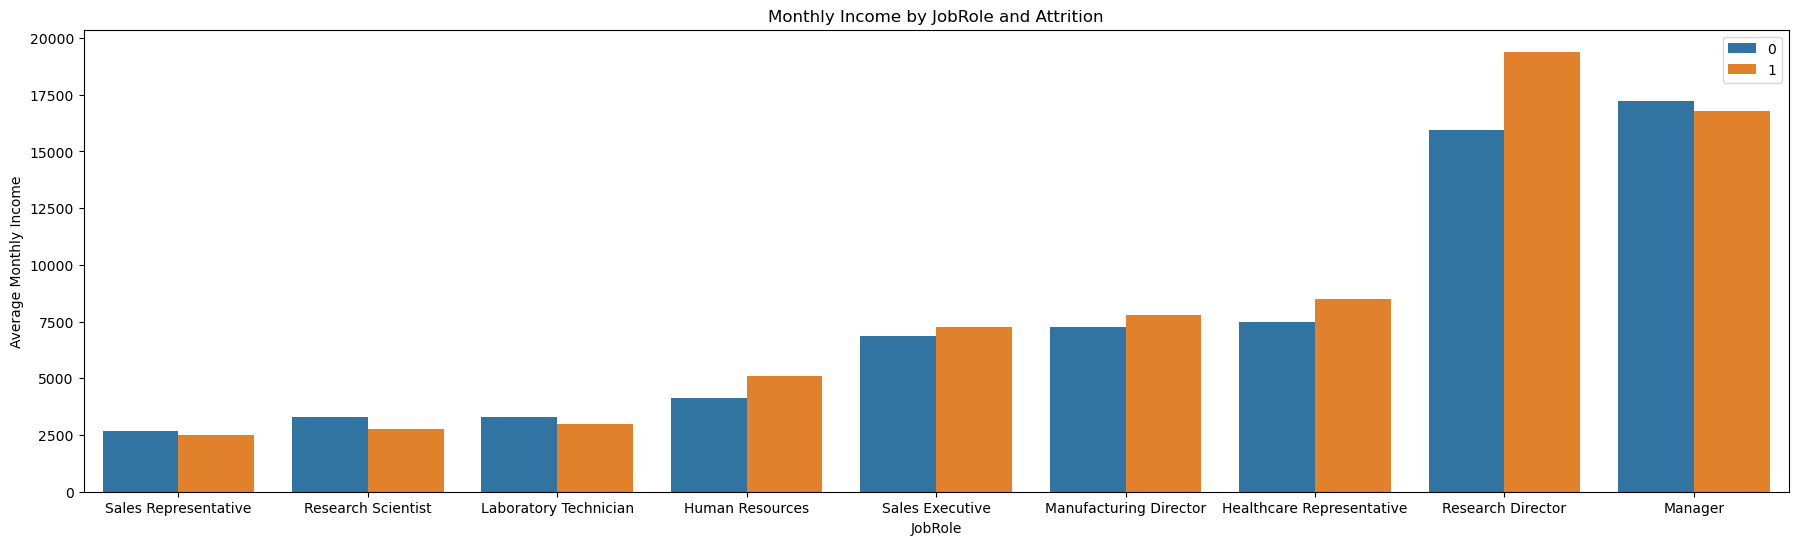

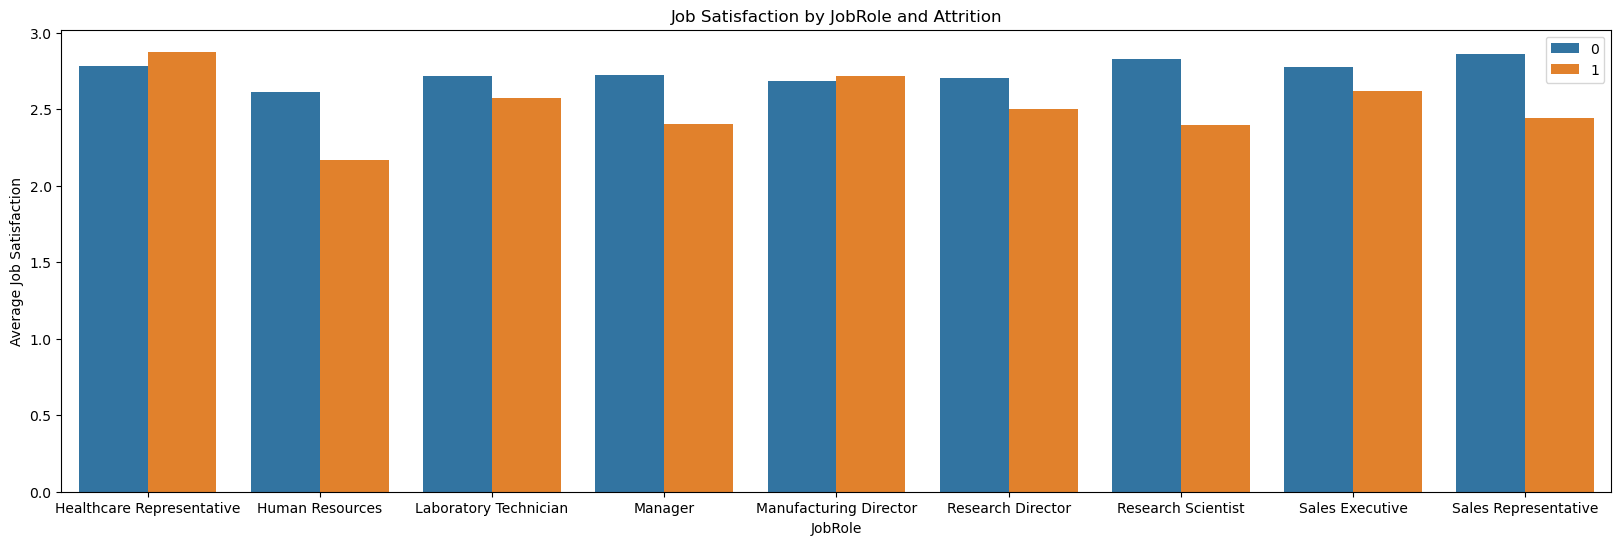

In [72]:
# Reset index untuk plotting
df_jobrole_reset = df_jobrole.reset_index()

# Bar plot untuk MonthlyIncome
plt.figure(figsize=(22, 6))
sns.barplot(data=df_jobrole_reset.sort_values(by='MonthlyIncome'), x='JobRole', y='MonthlyIncome', hue='Attrition', errorbar='ci')
plt.title('Monthly Income by JobRole and Attrition')
plt.ylabel('Average Monthly Income')
plt.xlabel('JobRole')
plt.legend(loc='upper right')
plt.show()

# Bar plot untuk JobSatisfaction
plt.figure(figsize=(20, 6))
sns.barplot(data=df_jobrole_reset, x='JobRole', y='JobSatisfaction', hue='Attrition', errorbar='ci')
plt.title('Job Satisfaction by JobRole and Attrition')
plt.ylabel('Average Job Satisfaction')
plt.xlabel('JobRole')
plt.legend(loc='upper right')
plt.show()

**Kesimpulan**

Berdasarkan grafik di atas, dapat disimpulkan bahwa tingkat attrition tidak memiliki korelasi tinggi dengan besarnya pendapatan bulanan jika dilihat dari aspek Job Role. Terlihat bahwa rata-rata karyawan yang keluar yaitu yang memiliki penghasilan bulanan lebih tinggi dibandingkan karyawan yang tidak keluar pada Job Role yang sama.

Sedangkan pada analisis Job Satisfaction dengan tingkat attrition dapat terlihat bahwa karyawan yang keluar memiliki Job Satisfaction yang cenderung lebih rendah dari karyawan yang tidak keluar pada Job Role yang sama.

### Visualisasi df_educationfield

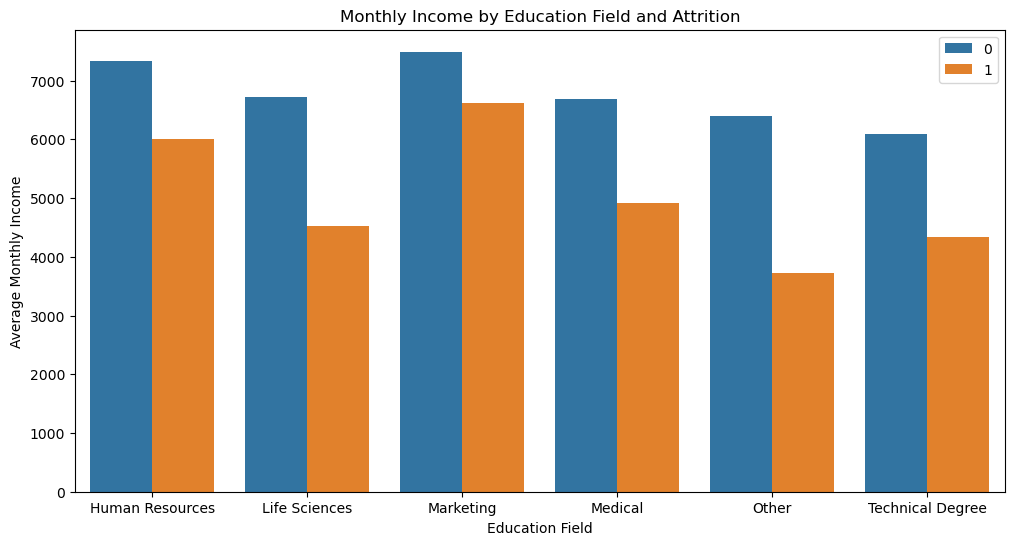

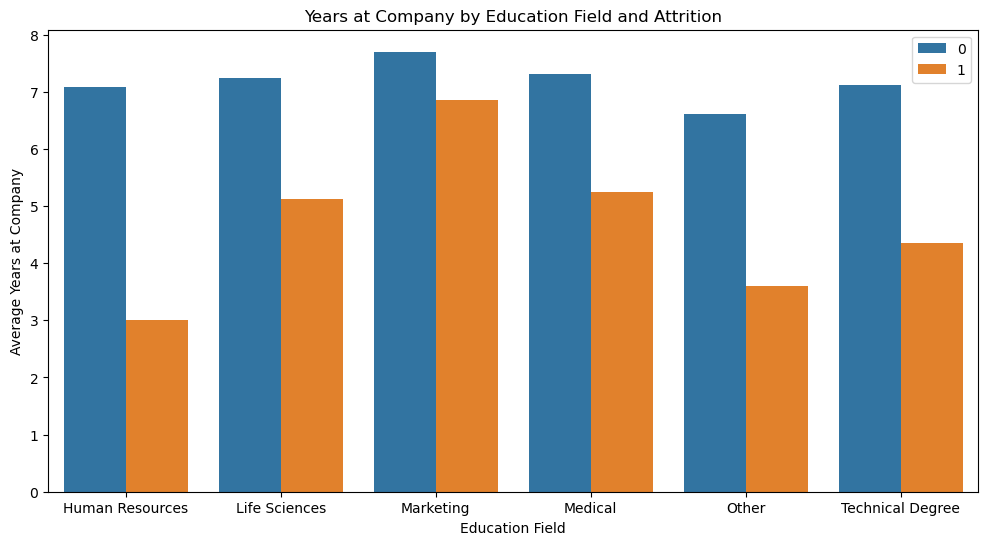

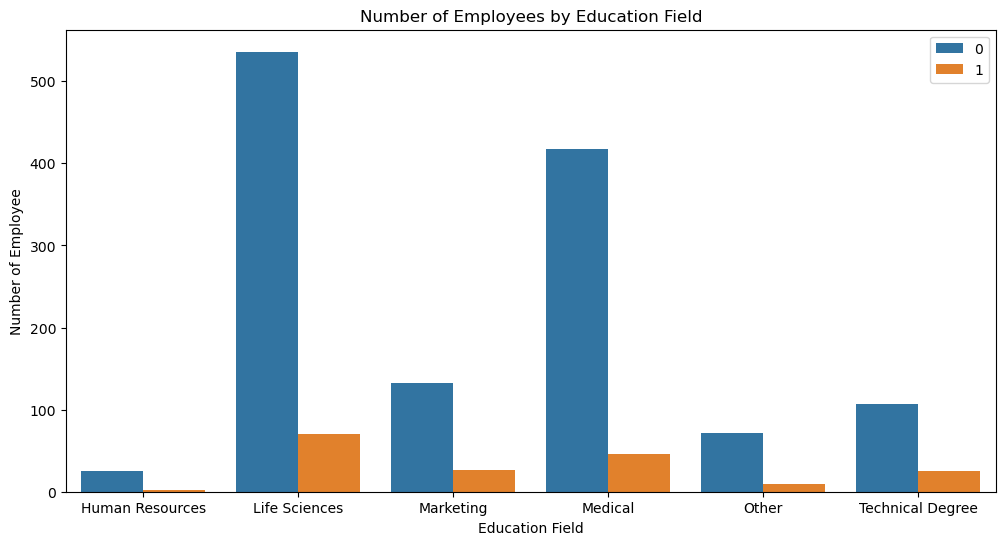

In [73]:
# Reset index untuk plotting
df_educationfield_reset = df_educationfield.reset_index()

# Bar plot untuk MonthlyIncome
plt.figure(figsize=(12, 6))
sns.barplot(data=df_educationfield_reset, x='EducationField', y='MonthlyIncome', hue='Attrition', errorbar='ci')
plt.title('Monthly Income by Education Field and Attrition')
plt.ylabel('Average Monthly Income')
plt.xlabel('Education Field')
plt.legend(loc='upper right')
plt.show()

# Bar plot untuk YearsAtCompany
plt.figure(figsize=(12, 6))
sns.barplot(data=df_educationfield_reset, x='EducationField', y='YearsAtCompany', hue='Attrition', errorbar='ci')
plt.title('Years at Company by Education Field and Attrition')
plt.ylabel('Average Years at Company')
plt.xlabel('Education Field')
plt.legend(loc='upper right')
plt.show()

# Bar plot untuk melihat jumlah karyawan berdasarkan Education Field
plt.figure(figsize=(12,6))
sns.barplot(data=df_educationfield_reset, x='EducationField', y='EmployeeId', hue='Attrition', errorbar='ci')
plt.title('Number of Employees by Education Field')
plt.ylabel('Number of Employee')
plt.xlabel('Education Field')
plt.legend(loc='upper right')
plt.show()

**Kesimpulan**

Berdasarkan grafik di atas, dapat disimpulkan bahwa bidang pendidikan karyawan yang sangat mungkin keluar dari perusahaan yaitu Technical Degree dan Marketing. Hal ini terlihat dari rasio karyawan yang keluar dengan yang tidak dari keseluruhan karyawan pada bidang pendidikan (Education Field) yang sama.

### Visualisasi df_businesstravel

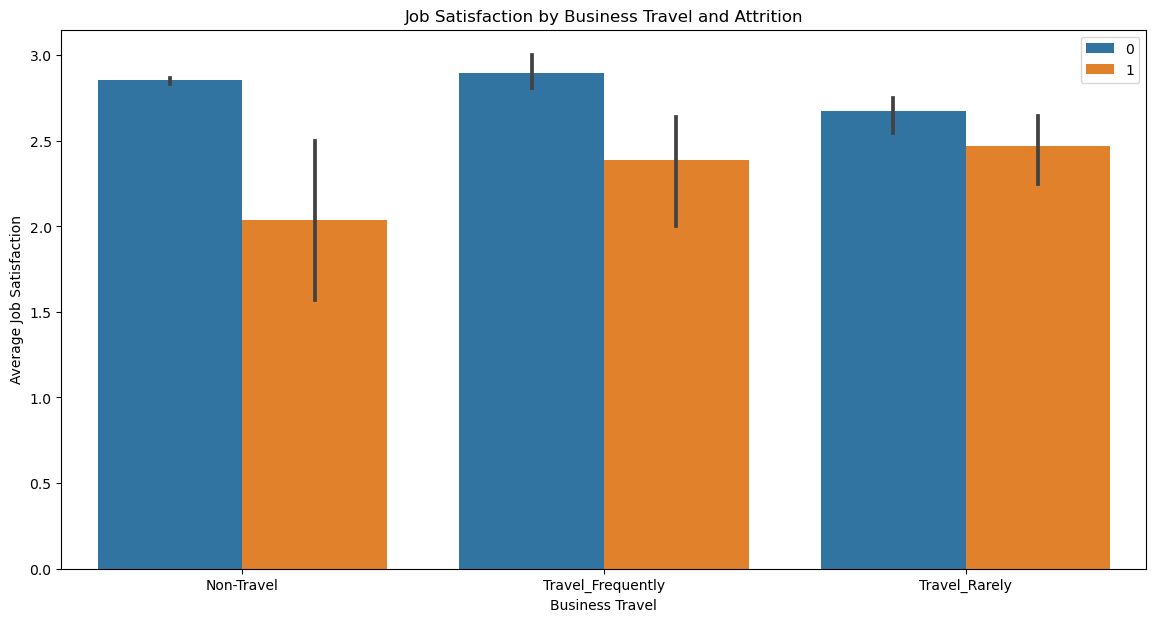

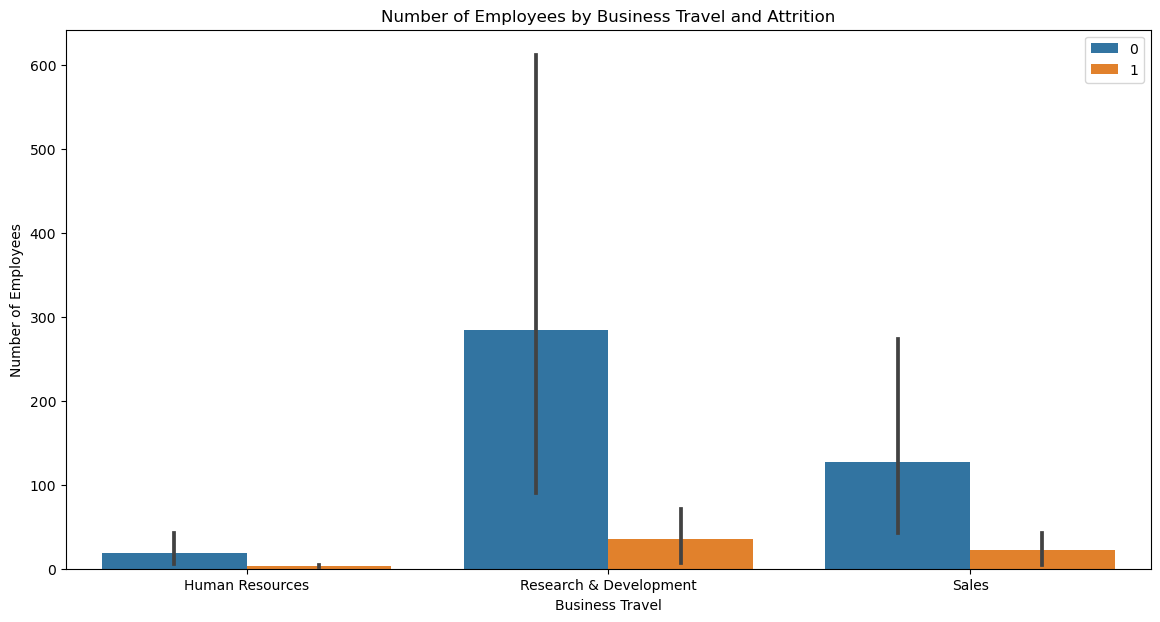

In [74]:
# Reset index untuk plotting
df_businesstravel_reset = df_businesstravel.reset_index()

# Bar plot untuk JobSatisfaction
plt.figure(figsize=(14, 7))
sns.barplot(data=df_businesstravel_reset, x='BusinessTravel', y='JobSatisfaction', hue='Attrition', errorbar='ci')
plt.title('Job Satisfaction by Business Travel and Attrition')
plt.ylabel('Average Job Satisfaction')
plt.xlabel('Business Travel')
plt.legend(loc='upper right')
plt.show()

# Membuat Clustered Bar Plot untuk jumlah karyawan
plt.figure(figsize=(14, 7))
sns.barplot(data=df_businesstravel_reset, x='Department', y='EmployeeId', hue='Attrition', errorbar='ci')
plt.title('Number of Employees by Business Travel and Attrition')
plt.ylabel('Number of Employees')
plt.xlabel('Business Travel')
plt.legend(loc='upper right')
plt.show()

**Kesimpulan**

Jika melihat grafik di atas, maka dapat diambil kesimpulan bahwa rata-rata karyawan yang keluar memiliki kepuasan kerja (job satisfaction) yang cenderung lebih rendah dari karyawan yang tidak keluar. Selain itu, karyawan yang jarang bepergian juga memiliki kemungkinan lebih tinggi untuk keluar dari perusahaan.

## Analisis Korelasi

Analisis korelasi merupakan sebuah metode statistik untuk mengukur kekuatan dan arah hubungan antar dua variabel. Analisis korelasi disini akan menggambarkan bagaimana korelasi antara variabel yang menjadi target dan variabel yang mempengaruhinya. Dalam hal ini, variabel yang menjadi target yaitu 'Attrition', sedangkan variabel lain akan dilihat berapa nilai pengahurnya terhadap variabel target.

D:\Programming\AI_ML\Dicoding\Submission\env\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


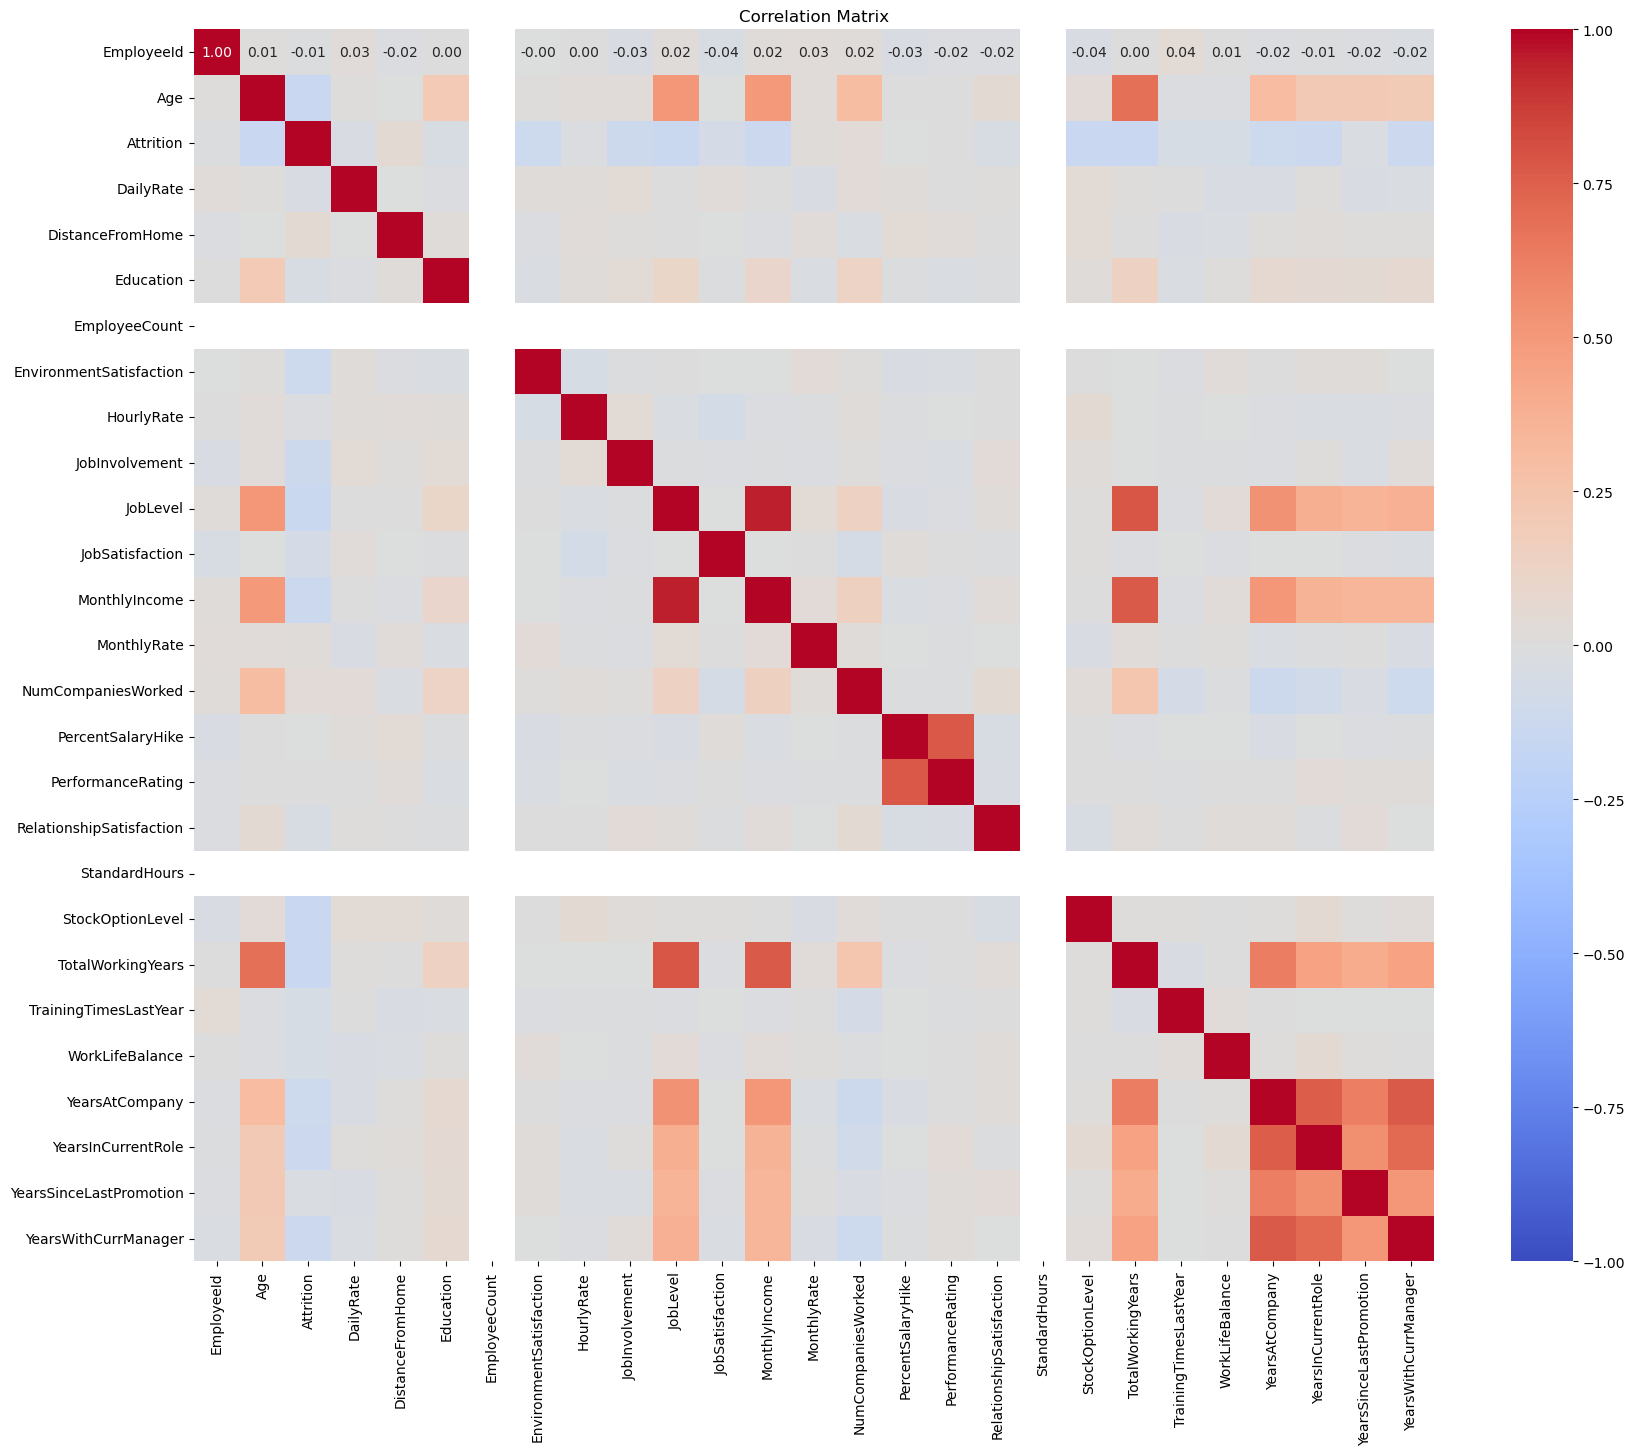

Attrition                   1.000000
DistanceFromHome            0.054043
NumCompaniesWorked          0.033253
MonthlyRate                 0.016637
PerformanceRating           0.002770
PercentSalaryHike          -0.001424
EmployeeId                 -0.013866
HourlyRate                 -0.018990
YearsSinceLastPromotion    -0.024932
DailyRate                  -0.036909
RelationshipSatisfaction   -0.039439
Education                  -0.039445
WorkLifeBalance            -0.047892
TrainingTimesLastYear      -0.048547
JobSatisfaction            -0.068709
YearsAtCompany             -0.110546
EnvironmentSatisfaction    -0.112694
JobInvolvement             -0.118902
YearsInCurrentRole         -0.127525
YearsWithCurrManager       -0.127744
MonthlyIncome              -0.128963
JobLevel                   -0.134312
Age                        -0.140856
TotalWorkingYears          -0.143096
StockOptionLevel           -0.146786
EmployeeCount                    NaN
StandardHours                    NaN
N

In [75]:
df_numeric = df.select_dtypes(include=[int, float])

df['Attrition'] = df['Attrition'].astype('int')

plt.figure(figsize=(20, 16))
correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

attrition_corr = correlation_matrix['Attrition'].sort_values(ascending=False)

print(attrition_corr)

**Kesimpulan**

Berdasarkan nilai dari analisis korelasi di atas, terlihat bahwa variabel yang memiliki korelasi paling kuat yaitu (StockOptionLevel, TotalWorkingYears, Age, dan JobLevel.). Namun, korelasi yang dimiliki kolom tersebut yaitu korelasi negatif, yang berarti semakin tinggi nilai pada kolom tersebut, maka nilai pada kolom/variabel Attrition akan semakin rendah. Misalnya pada kolom TotalWorkingYears, semakin tinggi total tahun bekerja, maka persentase pekerja tersebut untuk keluar akan semakin kecil.

# Modeling

In [76]:
feature_importance = ['StockOptionLevel', 'TotalWorkingYears', 'Age', 'JobLevel', 'MonthlyIncome', 'YearsWithCurrManager', 'YearsInCurrentRole', 'JobInvolvement', 'EnvironmentSatisfaction']

X = df[feature_importance]
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier()
lr_model = LogisticRegression()

rf_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)

D:\Programming\AI_ML\Dicoding\Submission\env\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluation

In [77]:
rf_score = rf_model.score(X_test, y_test)
lr_score = lr_model.score(X_test, y_test)

print(f'Random Forest Accuracy Score: {rf_score*100:.2f}%')
print(f'Logistic Regression Accuracy Score {lr_score*100:.2f}%')

Random Forest Accuracy Score: 88.10%
Logistic Regression Accuracy Score 89.12%


D:\Programming\AI_ML\Dicoding\Submission\env\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


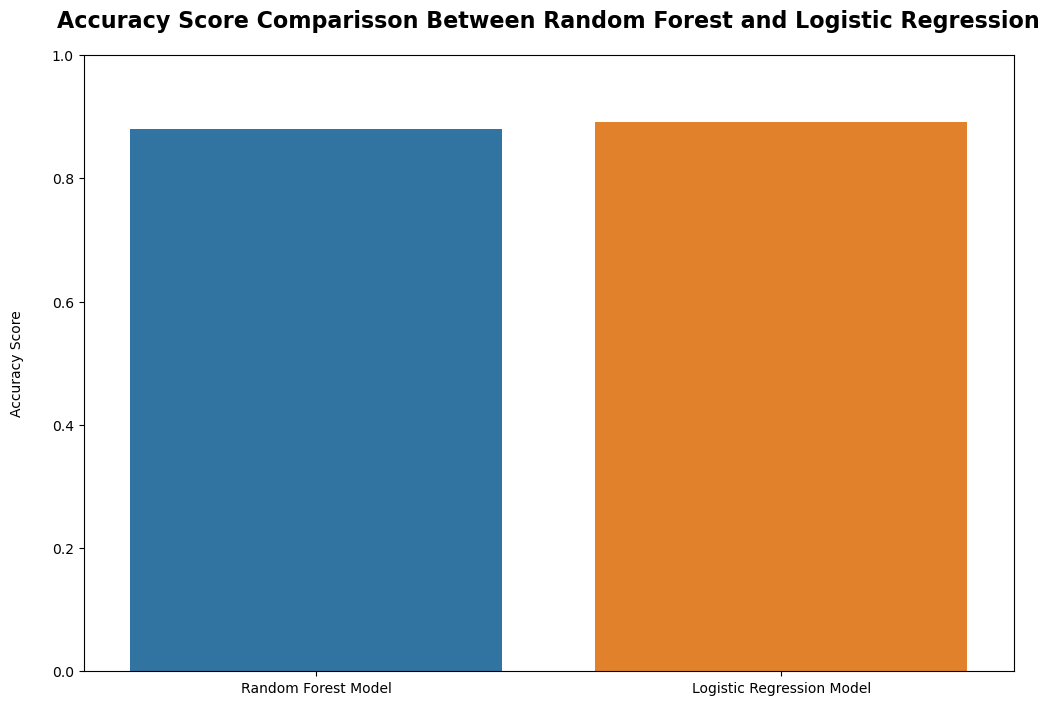

In [78]:
plt.subplots(figsize=(12, 8))
sns.barplot(x=['Random Forest Model', 'Logistic Regression Model'], y=[rf_score, lr_score])
plt.title('Accuracy Score Comparisson Between Random Forest and Logistic Regression', fontweight='bold', fontsize=16, pad=20)
plt.ylabel('Accuracy Score', labelpad=20)
plt.ylim(0, 1);

# Saving Model

In [79]:
# Logistic Regression Model
joblib.dump(lr_model, 'logistic_regression_model.pkl')

print('Model Berhasil Disimpan')

Model Berhasil Disimpan
